# Homework 3

In [1]:
# Import any tools or libaries we need here.

import pandas as pd
import numpy as np

# import matplotlib.pyplot as plt

 Firstly read the data 'churn.txt' and import as dataframe.
<br>
Have an overlook on the data: 
<br>
&emsp;&emsp;3333 rows (observations). 
<br>
&emsp;&emsp;21 columns (features).

In [2]:
# Read and import the data file as usual.

df = pd.read_csv('churn.txt')

print("Shape of 'churn.txt' data:", df.shape) # Have an overlook on the shape of the data.
df.head()                                     # Have an overlook on the first few of rows.

Shape of 'churn.txt' data: (3333, 21)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#State: Categorical, for the 50 states and the District of Columbia
<br>
#Account Length: Integer-valued, how long account has been active
<br>
#Area code: Categorical
<br>
#Phone Number: Essentially a surrogate for customer ID
<br>
#International Plan: Dichotomous categorical, yes or no
<br>
#Voice Mail Plan: Dichotomous categorical, yes or no
<br>
#Number of Voice Mail Messages: Integer-valued
<br>
#Total Day Minutes: Continuous,minutes customer used service during the day
<br>
#Total Day Calls: Integer-valued
<br>
#Total Day Charge: Continuous, perhaps based on above two variables
<br>
#Total Eve Minutes: Continuous, minutes customer used service during the evening
<br>
#Total Eve Calls: Integer-valued
<br>
#Total Eve Charge: Continuous, perhaps based on above two variables
<br>
#Total Night Minutes: Continuous, minutes customer used service during the night
<br>
#Total Night Calls: Integer-valued
<br>
#Total Night Charge: Continuous, perhaps based on above two variables
<br>
#Total International Minutes: Continuous, minutes customer used service to make international calls
<br>
#Total International Calls: Integer-valued
<br>
#Total International Charge: Continuous, perhaps based on above two variables
<br>
#Number of Calls to Customer Service: Integer-valued
<br>
#Churn: Target. Indicator of whether the customer has left the company (True or False)

## Problem 1
## Part a & Part c

Overall, my procedure of solving this problem is:
<br>
&emsp;&emsp;1. find outliers and then delete outliers from the whole dataset.
<br>
&emsp;&emsp;2. remove correlated features from the whole dataset according to Seaborn heatmap.
<br>
&emsp;&emsp;3. split the dataset into training set and testing set.
<br>
&emsp;&emsp;4. normalize the numeric data in training set
<br>
&emsp;&emsp;5. encode categorical data in both training and testing set.

### 1. Find outliers and then delete outliers from the whole dataset. 

The two outlier detection algorithms used uere are One Class SVF and Isolation Forest.
<br>
&emsp;&emsp;Totally, there are 3333 datapoints.
<br>
&emsp;&emsp;According to One-Class SVM, there are 166 datapoints outlied other agglomerate datapoints; other 3167 datapoints are relatively agminated. 
<br>
&emsp;&emsp;According to the Isolation-Forest, there are 267 datapoints outlied other agglomerate datapoints; other 3066 datapoints are relatively agminated. 

Drop outliers using One-Class SVM algorithm.

In [3]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

detector1 = OneClassSVM(nu=0.05) # nu is the percentage of data respect to outliers.
detector2 = IsolationForest(n_jobs=-1) # n_job = -1 means the entire CPU used to speed up.

predicted1 = detector1.fit_predict(df[['Account Length', 'VMail Message', 
                                       'Day Mins', 'Day Calls', 'Day Charge', 
                                       'Eve Mins', 'Eve Calls', 'Eve Charge', 
                                       'Night Mins', 'Night Calls', 'Night Charge', 
                                       'Intl Mins', 'Intl Calls', 'Intl Charge', 
                                       'CustServ Calls']])
                  
predicted2 = detector2.fit_predict(df[['Account Length', 'VMail Message', 
                                       'Day Mins', 'Day Calls', 'Day Charge', 
                                       'Eve Mins', 'Eve Calls', 'Eve Charge', 
                                       'Night Mins', 'Night Calls', 'Night Charge', 
                                       'Intl Mins', 'Intl Calls', 'Intl Charge', 
                                       'CustServ Calls']])

print("SVM:")
print(pd.crosstab(predicted1, columns=['count']))
print("Isolation Forest:")
print(pd.crosstab(predicted2, columns=['count']))

SVM:
col_0  count
row_0       
-1       166
 1      3167
Isolation Forest:
col_0  count
row_0       
-1       269
 1      3064


In [4]:
svm_outcome = np.where(predicted1 == -1)
if_outcome = np.where(predicted2 == -1)
svm_if_intersection = np.intersect1d(svm_outcome, if_outcome)
print("SVM vs IF")
print(f"Size of intersection: {len(svm_if_intersection)}")

SVM vs IF
Size of intersection: 93


In [5]:
#Dropping SVM outliers
print(f"Size before dropping outlier(s): {len(df)}")
df_clean = df.drop(svm_outcome[0])
print(f"Size after dropping outlier(s): {len(df_clean)}")

Size before dropping outlier(s): 3333
Size after dropping outlier(s): 3167


### 2. Remove correlated features from the whole dataset according to Seaborn heatmap. (Part c)

According to the heat map, highy correlated features are:
<br>
&emsp;&emsp;'Day Charge' and 'Day Mins';
<br>
&emsp;&emsp;'Eve Charge' and 'Eve Mins';
<br>
&emsp;&emsp;'Night Charge' and 'Night Mins'
<br>
&emsp;&emsp;'Intl Charge' and 'Night Mins'
<br>
<br>
Here I decide to ignore all 'Charge' features.
So I did not include any 'Charge' features in training and testing set, but they are kept in dataframe df_clean.

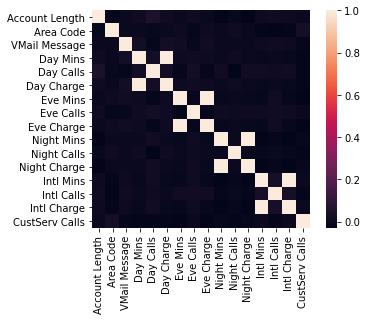

In [6]:
import seaborn as sns
g = sns.heatmap(df_clean.corr(),annot=False,  square=True)

In [7]:
# Reset the datframe, ignore all 'Cahrge' features.
df_clean = df_clean[['State', 'Account Length', 'Area Code', 'Phone', 
                     'Int\'l Plan', 'VMail Plan', 'VMail Message', 
                     'Day Mins', 'Day Calls',
                     'Eve Mins', 'Eve Calls',
                     'Night Mins', 'Night Calls',
                     'Intl Mins', 'Intl Calls',
                     'CustServ Calls', 
                     'Churn?']]

In [8]:
# Have look at reseted features.
df_clean.head(1)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.


### 3. Split the dataset into training set and testing set. 

In [9]:
from sklearn.model_selection import train_test_split

# Features (Independent Variables)
X = df_clean[['State', 'Account Length', 'Area Code', 'Phone', 
              'Int\'l Plan', 'VMail Plan', 'VMail Message', 
              'Day Mins', 'Day Calls',
              'Eve Mins', 'Eve Calls',
              'Night Mins', 'Night Calls',
              'Intl Mins', 'Intl Calls',
              'CustServ Calls']]

# Dependent Variables
Y = df_clean['Churn?']

# Split the data into 70% train set and 30% test set.
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.3)

### 4. Normalize the numeric data in training set .

Normalize all numerical variables (15 numerical-type features).
<br>
Compress all the data to a number between 0 and 1 using Mini-Max Scaler.

There will be a warning pop-up, but it does not affect the output.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Extract all numerical data.
# There are totally 15  numerical-type features.
numeric_x_train = x_train[['Account Length', 'VMail Message', 
                           'Day Mins', 'Day Calls', 
                           'Eve Mins', 'Eve Calls', 
                           'Night Mins', 'Night Calls', 
                           'Intl Mins', 'Intl Calls',
                           'CustServ Calls']]

# Implement Min-Max Scaler:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numeric_x_train)
numeric_x_train = scaled_values

# Apply scaled (normalized) data to the original dataframe df.
x_train.loc[: ,['Account Length', 'VMail Message', 
                'Day Mins', 'Day Calls', 
                'Eve Mins', 'Eve Calls', 
                'Night Mins', 'Night Calls',
                'Intl Mins', 'Intl Calls',
                'CustServ Calls']] = numeric_x_train

/Users/liubohan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [11]:
# And have a look at the normalized data.
x_train[['Account Length', 'VMail Message', 
         'Day Mins', 'Day Calls', 
         'Eve Mins', 'Eve Calls', 
         'Night Mins', 'Night Calls', 
         'Intl Mins', 'Intl Calls',
         'CustServ Calls']].head()

,Account Length,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls
836,0.357143,0.607843,0.607651,0.518519,0.575276,0.544872,0.388550,0.598540,0.527174,0.210526,0.000000
373,0.138393,0.000000,0.453284,0.503704,0.590470,0.538462,0.383808,0.510949,0.804348,0.105263,0.222222
596,0.549107,0.000000,0.428571,0.296296,0.247928,0.429487,0.472222,0.437956,0.521739,0.210526,0.333333
798,0.598214,0.431373,0.562627,0.614815,0.692334,0.532051,0.273374,0.708029,0.793478,0.263158,0.222222
968,0.540179,0.647059,0.487475,0.540741,0.653660,0.596154,0.374661,0.569343,0.733696,0.157895,0.111111


### 5. Encode categorical data in both training and testing set.

After normalizing numeric data, then encoding categorical data.
<br>
There are two kinds of categorical features in this dataset:
<br>
&emsp;&emsp;Nominal features, which is encoded by either One-Hot encoder or Label Encoder here.
<br>
&emsp;&emsp;Binary features, which is encoded by converting 't'/'f' string to int 0/1.
<br>
The reason that I do not use Ordinal Encoder is these are Nominal features without order or sequence.

Below is an example of using the One-Hot encoder to encode the 'State' feature. 
<br>
There will be a warning pop-up, but it does not matter here, since the 'State' feature will be dropped later.

In [12]:
import category_encoders as ce

X = x_train['State']

ce_one_hot = ce.OneHotEncoder(cols=['State'])
ce_one_hot.fit_transform(X).head()

/Users/liubohan/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,State_10,...,State_42,State_43,State_44,State_45,State_46,State_47,State_48,State_49,State_50,State_51
836,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
968,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Below is an example of using the Label Encoder to encode the 'Area Code' feature. 
<br>
I have to say it is better to use the One-Hot encoder here. 
<br>
Label Encoder is better used when dealing with ordinal data. 
<br>
&emsp;&emsp;(If we dealing with area code with sequential order, then Label Encoder could be a better choice.)
<br>
Anyway, this is just an example of using Label Encoder, the 'Area Code' feature will also be dropped later.

In [13]:
from sklearn.preprocessing import LabelEncoder

X = x_train['Area Code']

# Dealing with Nominal features.
# Using Label Encoder converting the same strings to a same integer.
le = LabelEncoder()
le.fit(X)
label = le.transform(X)
X = label

In [14]:
# Have a look at the encoded 'Area Code' feature.
X_df = pd.DataFrame(X, columns=['Area Code'])
X_df.head(3)

,Area Code
0,1
1,1
2,2


The rest of the dataset are all Ture/False data, binary type of data. 
<br>
('Phone' feature is ignored. Although it can be processed by One-Hot, it will generate a large table with no repetition, and it is useless for this homework.)
<br>
Below is the procedure of converting True/False to 1/0.
<br>
There will be a lot of pop-up warnings since there is something wrong with using .loc and .iloc. Since it does not affect the result, so I just ignored them. 

In [15]:
# Dealing with Binary features.
# For each Binary feature:
#     if its value is 'True' or 'yes', convert the value to int 1.
#     if its value is 'False' or 'no', convert the value to int 0.

# Process Binary features in train set.
for i in x_train[['Int\'l Plan', 'VMail Plan']]:
    for j in range(len(x_train)):
        if x_train[i].iloc[j] == 'True.' or x_train[i].iloc[j] == 'yes':
            x_train[i].iloc[j] = 1
        elif x_train[i].iloc[j] == 'False.' or x_train[i].iloc[j] == 'no':
            x_train[i].iloc[j] = 0

# Also process Binary features in test set.
# Since the program does not recognize string'True/False' and 'yes/no'.
for i in x_test[['Int\'l Plan', 'VMail Plan']]:
    for j in range(len(x_test)):
        if x_test[i].iloc[j] == 'True.' or x_test[i].iloc[j] == 'yes':
            x_test[i].iloc[j] = 1
        elif x_test[i].iloc[j] == 'False.' or x_test[i].iloc[j] == 'no':
            x_test[i].iloc[j] = 0

# Do the same Binary procedure for Dependent Variable y (Train set).
for i in range(len(y_train)):
    if y_train.iloc[i] == 'True.' or y_train.iloc[i] == 'yes':
        y_train.iloc[i] = 1
    elif y_train.iloc[i] == 'False.' or y_train.iloc[i] == 'no':
        y_train.iloc[i] = 0    
# Do the same Binary procedure for Dependent Variable y (Test set).
for i in range(len(y_test)):
    if y_test.iloc[i] == 'True.' or y_test.iloc[i] == 'yes':
        y_test.iloc[i] = 1
    elif y_test.iloc[i] == 'False.' or y_test.iloc[i] == 'no':
        y_test.iloc[i] = 0

/Users/liubohan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [16]:
# Have a look at the encoded data.
x_train[['Int\'l Plan', 'VMail Plan']].head(2)

,Int'l Plan,VMail Plan
836,0,1
373,0,0


In [17]:
# Have a look at the encoded data.
x_test[['Int\'l Plan', 'VMail Plan']].head(2)

,Int'l Plan,VMail Plan
3278,0,0
2429,0,1


In [18]:
# Have a look at the encoded data.
y_train.head(2)

836    0
373    0
Name: Churn?, dtype: object

In [19]:
# Have a look at the encoded data.
y_test.head(2)

3278    0
2429    0
Name: Churn?, dtype: object

## Problem 1
## Part b

To identify the outliers of the dataset, One-Class SVM and Isolation-Forest techniques are implemented on the dataset's numerical-type features. The results of both One-Class SVM and Isolation-Forest show that there are outliers on the dataset. 

However, these two techniques do not agree with the number of outliers. According to One-Class SVM, there are 166 datapoints outlied other agglomerate datapoints; other 3167 datapoints are relatively agminated. 
<br>
According to the Isolation-Forest, there are 267 datapoints outlied other agglomerate datapoints; other 3066 datapoints are relatively agminated. 
<br>
Totally, there are 3333 datapoints.

The reason causes this difference I think is that these two techniques have different rules identifying outliers. For example, when we call the function OneClassSVM(nu=0.05), the parameter 'nu' defines what percentage of the whole dataset is aimed to be identified as outliers; on the other hand, When we call IsolationForest(n_jobs=-1), the parameter n_jobs asks for how much computational power are allowed to identify outliers. 
<br>
Apparently, there are differences between these two techniques' rules when identifying outliers.

## Problem 2
## Part a

Clear up the portion of the dataset I gonna put into the neural network:
<br>
'Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls', 'CustServ Calls'

In [20]:
x_train = x_train[['Account Length',
                   'VMail Message', 
                   'Day Mins', 'Day Calls', 
                   'Eve Mins', 'Eve Calls', 
                   'Night Mins', 'Night Calls', 
                   'Intl Mins', 'Intl Calls',
                   'CustServ Calls']]

x_test = x_test[['Account Length',
                 'VMail Message', 
                 'Day Mins', 'Day Calls', 
                 'Eve Mins', 'Eve Calls', 
                 'Night Mins', 'Night Calls', 
                 'Intl Mins', 'Intl Calls',
                 'CustServ Calls']]

In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 836 to 1992
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  2216 non-null   float64
 1   VMail Message   2216 non-null   float64
 2   Day Mins        2216 non-null   float64
 3   Day Calls       2216 non-null   float64
 4   Eve Mins        2216 non-null   float64
 5   Eve Calls       2216 non-null   float64
 6   Night Mins      2216 non-null   float64
 7   Night Calls     2216 non-null   float64
 8   Intl Mins       2216 non-null   float64
 9   Intl Calls      2216 non-null   float64
 10  CustServ Calls  2216 non-null   float64
dtypes: float64(11)
memory usage: 207.8 KB


In [22]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 3278 to 3245
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  951 non-null    int64  
 1   VMail Message   951 non-null    int64  
 2   Day Mins        951 non-null    float64
 3   Day Calls       951 non-null    int64  
 4   Eve Mins        951 non-null    float64
 5   Eve Calls       951 non-null    int64  
 6   Night Mins      951 non-null    float64
 7   Night Calls     951 non-null    int64  
 8   Intl Mins       951 non-null    float64
 9   Intl Calls      951 non-null    int64  
 10  CustServ Calls  951 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 89.2 KB


Using tensorflow.keras to form a Sequential ANN.
<br>
There are four layers in this ANN: input layer + 2 hidden layers + output layer.
<br>
The input layer is automatically created, and three more layers are added by model.add().
<br>
&emsp;&emsp;For the input layers, there should be 11 nodes, since there are 11 input features.
<br>
&emsp;&emsp;For the two hidden layers, there are 4 nodes in each layer decided by the programmer. Too many nodes will increase the training time.
<br>
&emsp;&emsp;For the output layer, there is only 1 node, since there is only one feature 'Churn?' to output.
<br>
All layers using sigmoid function (1/(1+e^(-x))) as activation function.

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(4, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(layers.Dense(4,  activation='sigmoid'))
model.add(layers.Dense(1,  activation='sigmoid'))

In [24]:
model.compile(loss='mse', optimizer='adam', 
              metrics=['accuracy', 
                       keras.metrics.Precision(name="precision", thresholds=0.5),
                       keras.metrics.Recall(name="recall", thresholds=0.5)
                      ]
             )

In [25]:
class FitCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        weights.append(self.model.layers[1].get_weights())
        
weights = []

<AxesSubplot:>

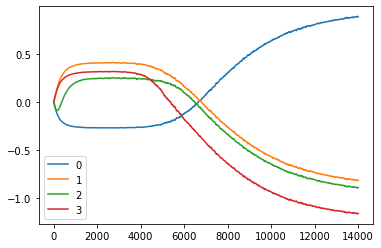

In [26]:
x_array = np.asarray(x_train)
y_array = np.asarray(y_train).astype('float64')

result = model.fit(x_array, y_array, epochs=200, batch_size=32, verbose=0, callbacks=[FitCallback()])

pd.DataFrame([x[-1] for x in weights]).plot()

Below reports loss, accuracy, precision and recall score for the test set

In [27]:
x_array = np.asarray(x_test)
y_array = np.asarray(y_test).astype('float64')

score = model.evaluate(x_array, y_array)

print(" ")
print("Loss:", score[0])
print("Accuracy:", score[1])
print("Precision:", score[2])
print("Recall:", score[3])

30/30 [==============================] - 0s 865us/step - loss: 0.3077 - accuracy: 0.1420 - precision: 0.1420 - recall: 1.0000
 
Loss: 0.30767950415611267
Accuracy: 0.14195583760738373
Precision: 0.14195583760738373
Recall: 1.0


### Training and Testing Error Plot

## Problem 3

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(4, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(layers.Dense(4,  activation='sigmoid'))
model.add(layers.Dense(1,  activation='sigmoid'))

In [29]:
X = df_clean[['Account Length',
              'VMail Message', 
              'Day Mins', 'Day Calls', 
              'Eve Mins', 'Eve Calls', 
              'Night Mins', 'Night Calls', 
              'Intl Mins', 'Intl Calls',
              'CustServ Calls']]

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(X)
X = scaled_values


Y = df_clean['Churn?']

for i in range(len(Y)):
    if Y.iloc[i] == 'True.' or Y.iloc[i] == 'yes':
        Y.iloc[i] = 1
    elif Y.iloc[i] == 'False.' or Y.iloc[i] == 'no':
        Y.iloc[i] = 0

/Users/liubohan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [30]:
model.compile(loss='mse', optimizer='adam', 
              metrics=['accuracy', 
                       keras.metrics.Precision(name="precision", thresholds=0.5),
                       keras.metrics.Recall(name="recall", thresholds=0.5)])

In [31]:
class FitCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        weights.append(self.model.layers[1].get_weights())

In [32]:
weights = []

<AxesSubplot:>

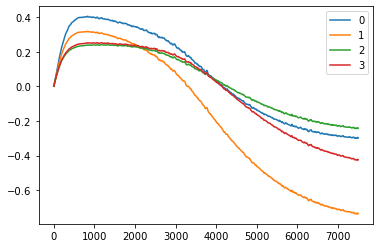

In [33]:
x_array = np.asarray(X)
y_array = np.asarray(Y).astype('float64')

result = model.fit(x_array, y_array, epochs=150, batch_size=64, verbose=0, callbacks=[FitCallback()])

pd.DataFrame([x[-1] for x in weights]).plot()

In [34]:
model.evaluate(x_array, y_array)

99/99 [==============================] - 0s 716us/step - loss: 0.1061 - accuracy: 0.8626 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.10610271990299225, 0.8626460433006287, 0.0, 0.0]